# Test

In [1]:
from UEMEC.core import UeMEC, PARAMS
import UEMEC.printer as kp
import torch as tt

In [2]:
param = PARAMS(2, 6, 20)

umec = UeMEC('cpu', param, seed=12)
#kp.show(umec)
umec.snapping(10)


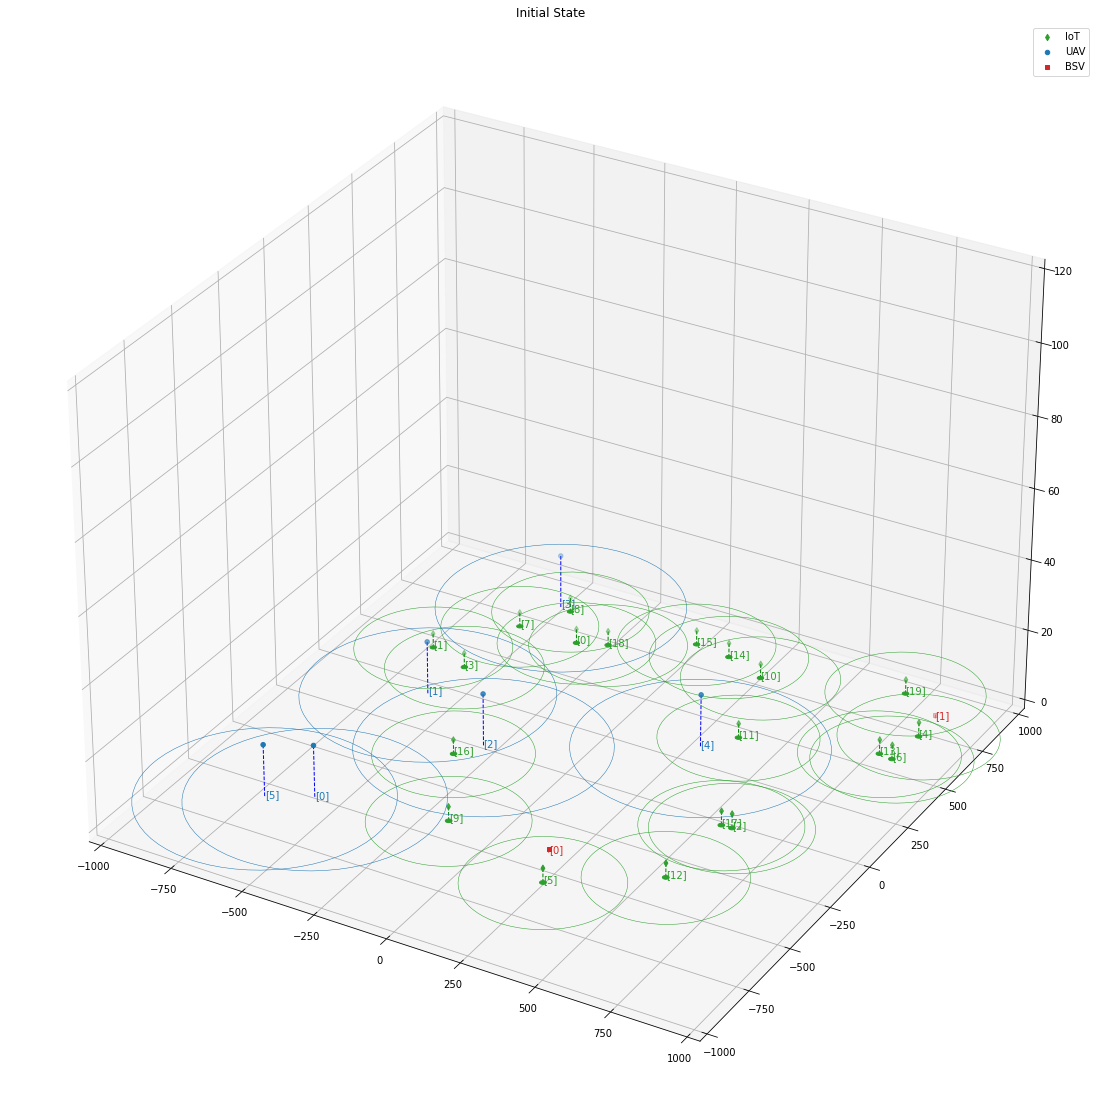

AD: {'noop': 0, 'move_BSV': 1, 'move_UAV': 2, 'disconnect_IOT_UAV': 3, 'connect_IOT_UAV': 4, 'disconnect_UAV_BSV': 5, 'connect_UAV_BSV': 6, 'onload_IOT': 7, 'offload_IOT': 8}


In [3]:
ts, done = 0, False
AD=umec.AD
cs = umec.reset()
_=umec.render(caption="Initial State", ant=True, cover=True, offloading=True)
umec.snap(False)
print('AD:', AD)

Trying to move BSV[0] from [tensor([ 202., -449.,    1.])] to [(0, 0)]
... Success moving BSV, now at [tensor([0., 0., 1.])]


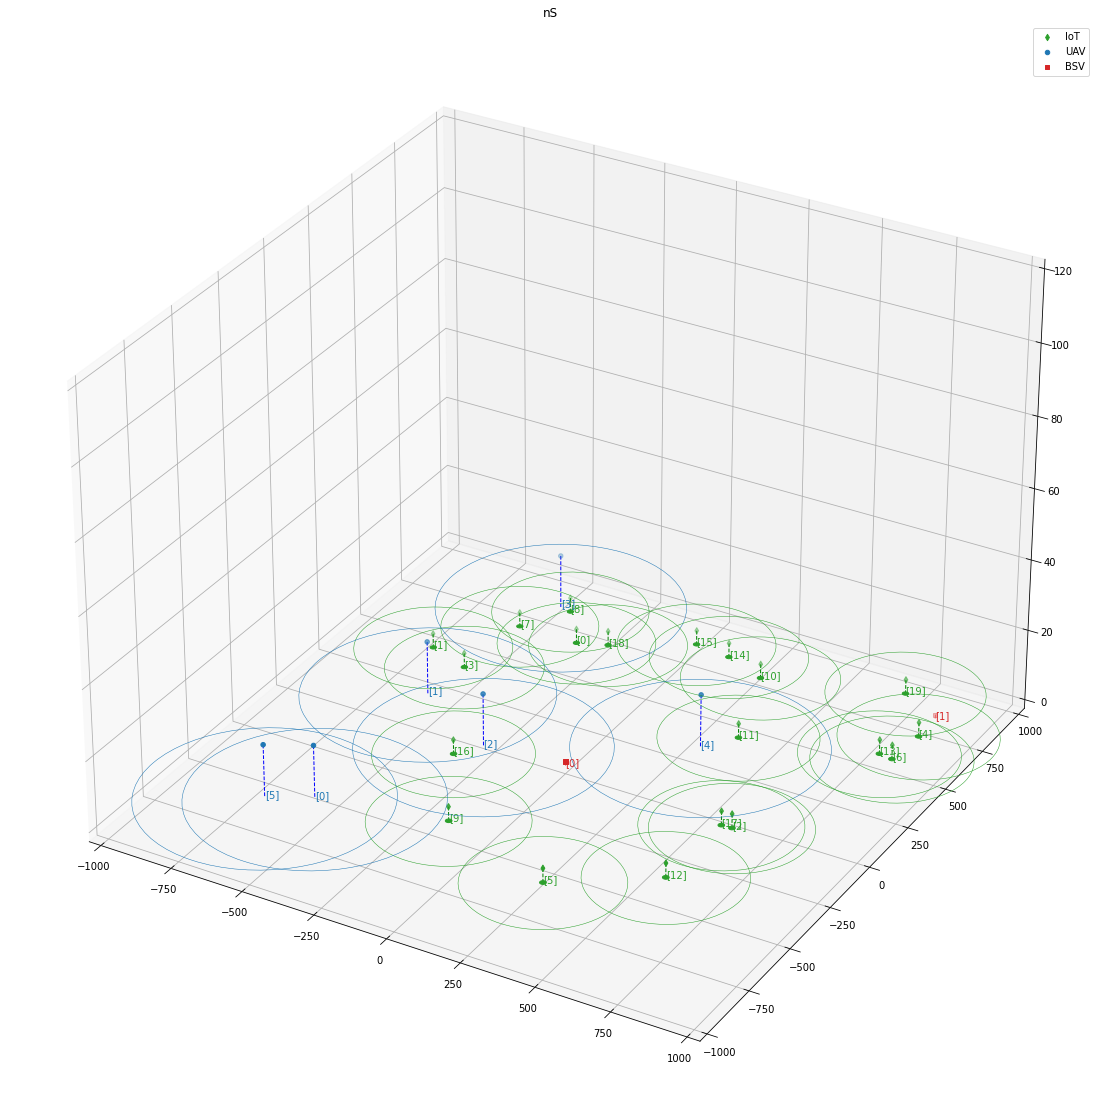

In [4]:
ns, r, a, _ = umec.step( (AD['move_BSV'], 0,0,0) )
_=umec.render(caption="nS", ant=True, cover=True, offloading=True)
umec.snap(True)

Connecting UAV[2] --> BSV[0/20]

... Connection Success


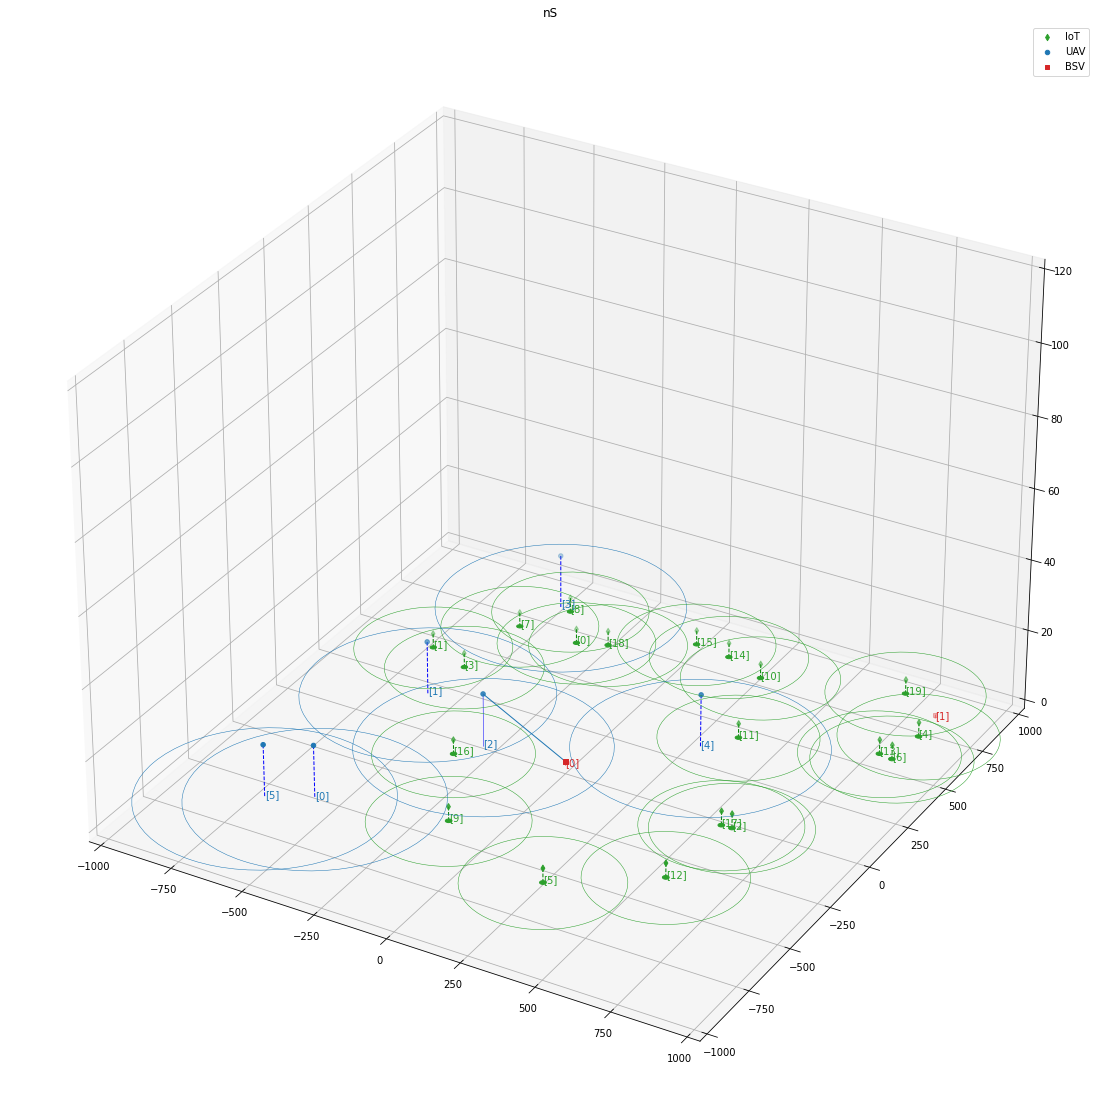

In [5]:
ns, r, a, _ = umec.step( (AD['connect_UAV_BSV'], 2,0,20) )
_=umec.render(caption="nS", ant=True, cover=True, offloading=True)
umec.snap(True)

Connecting IOT[16] --> UAV[2/5]

... Connection Success



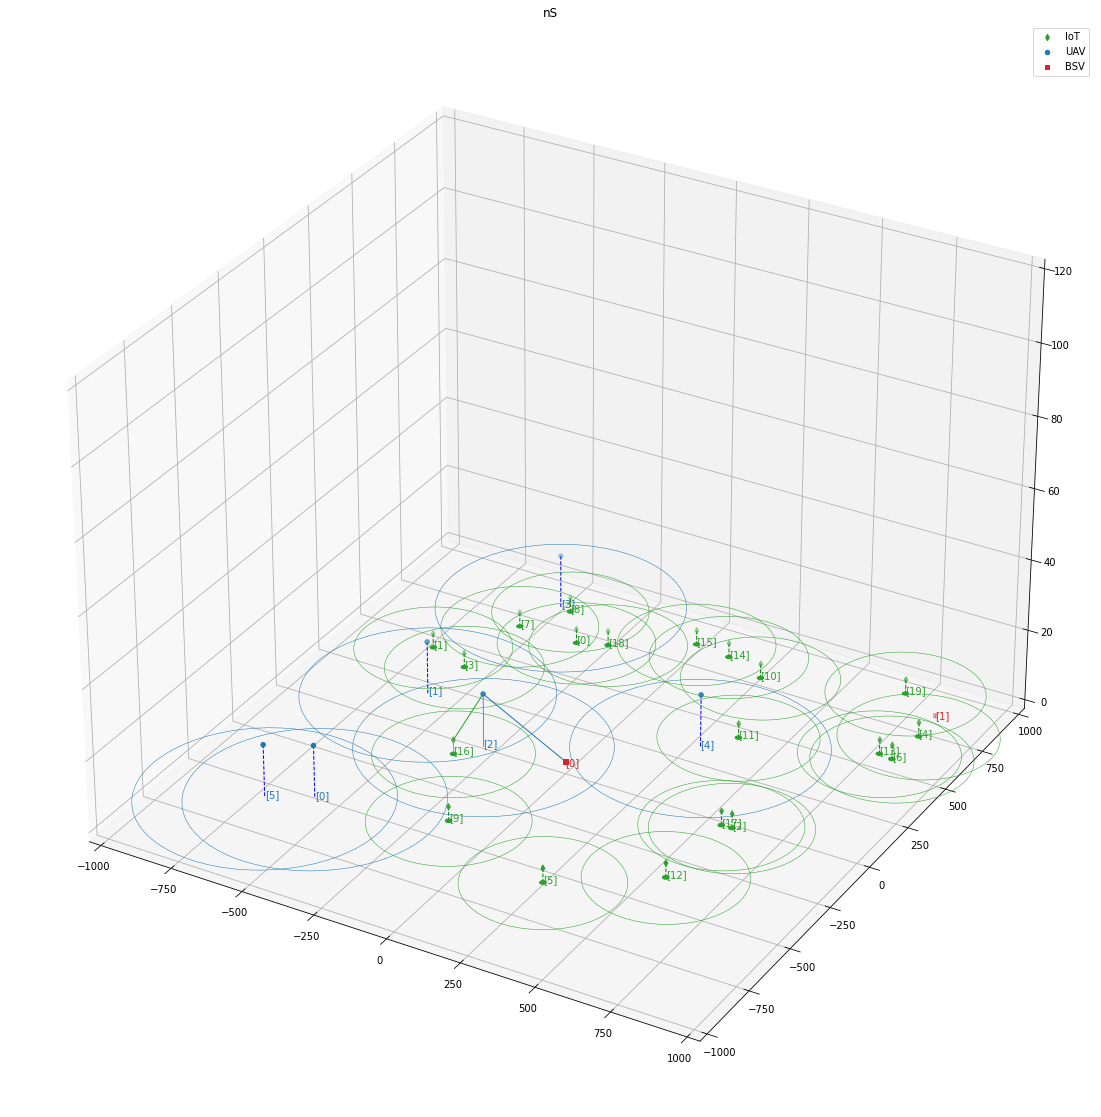

In [6]:
ns, r, a, _ = umec.step( (AD['connect_IOT_UAV'], 16,2,5) )
_=umec.render(caption="nS", ant=True, cover=True, offloading=True)
umec.snap(True)

Connecting IOT[11] --> UAV[4/5]

Cannot connect to AdHoC UAV


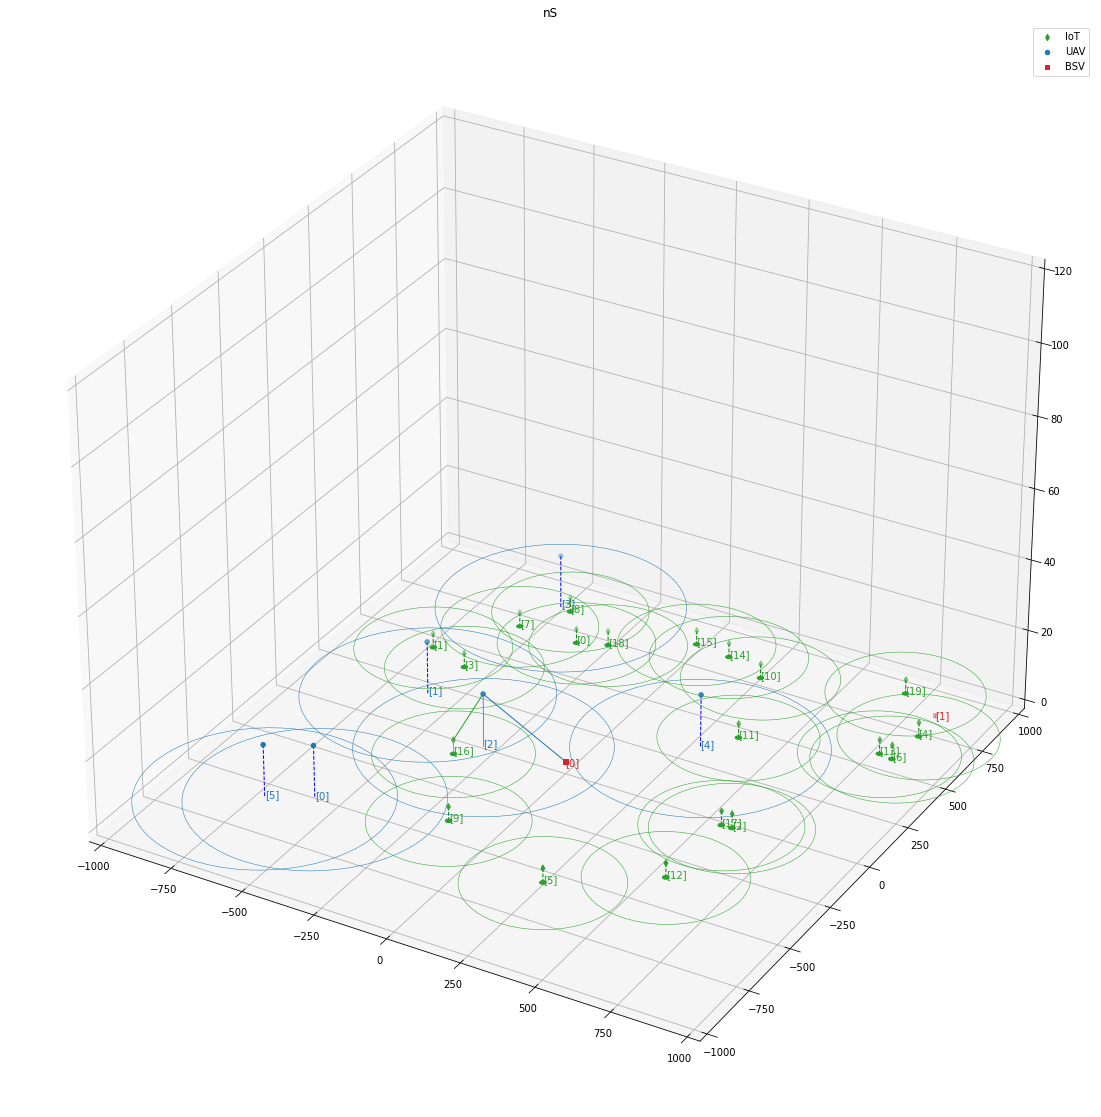

In [7]:
ns, r, a, _ = umec.step( (AD['connect_IOT_UAV'],11,4,5) )
_=umec.render(caption="nS", ant=True, cover=True, offloading=True)
umec.snap(True)

Connecting UAV[4] --> BSV[0/20]

BSV [425.2728576660156]m not in transmission range [tensor([400.])]m of UAV 



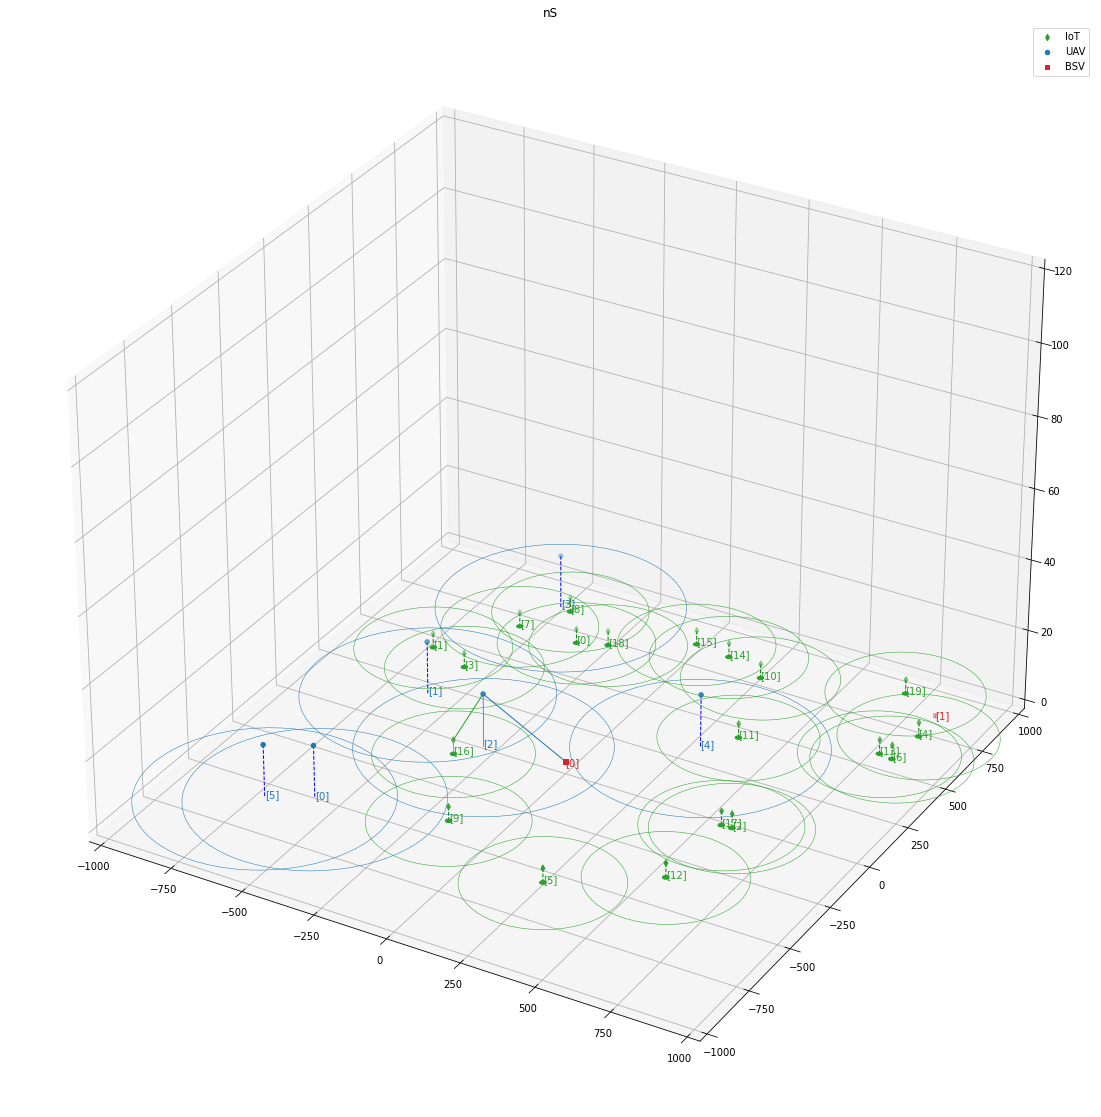

In [8]:
ns, r, a, _ = umec.step( (AD['connect_UAV_BSV'],4,0,20) )
_=umec.render(caption="nS", ant=True, cover=True, offloading=True)
umec.snap(True)

Trying to offload IOT[16] at LOC[1] with [2]CC

Currently Oflloading to [-1/0.0]

... Offloading to BSV Success


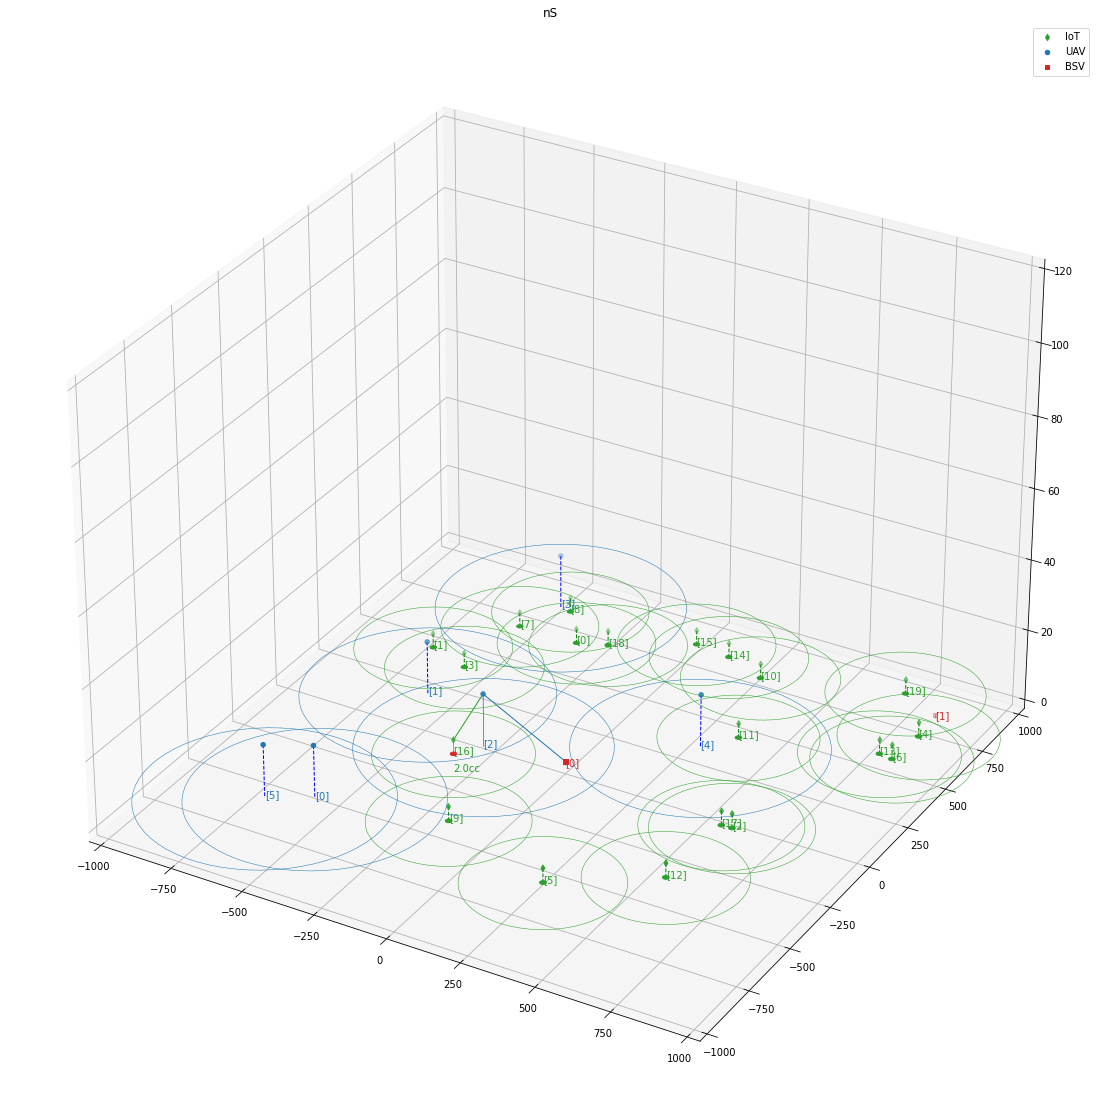

In [9]:
ns, r, a, _ = umec.step( (AD['offload_IOT'], 16,1,2) )
_=umec.render(caption="nS", ant=True, cover=True, offloading=True)
umec.snap(True)

Trying to move BSV[0] from [tensor([0., 0., 1.])] to [(200, 200)]
BSV[0] Moved out of transmit range of UAV[2]
Dis-Connecting UAV[2] --> BSV[0/20.0]

UAV-Disconnected from BSV[0] reclaimed bandwidth [20.0/50000.0]

Dis-Connecting IOT[16] connected to UAV[2/5.0]

IOT-Disconnected from UAV [2] reclaimed bandwidth [5.0/10000.0]

Trying to onload IOT[16] currently offloaded at LOC[1] with [2.0]CC

Parent-Chain: IOT[16] --> UAV[2] --> BSV[0]
Reclaimed [2.0]CC to BSV[0] now has [50000.0]CC

... Oddloading Disabled
... Success moving BSV, now at [tensor([200., 200.,   1.])]


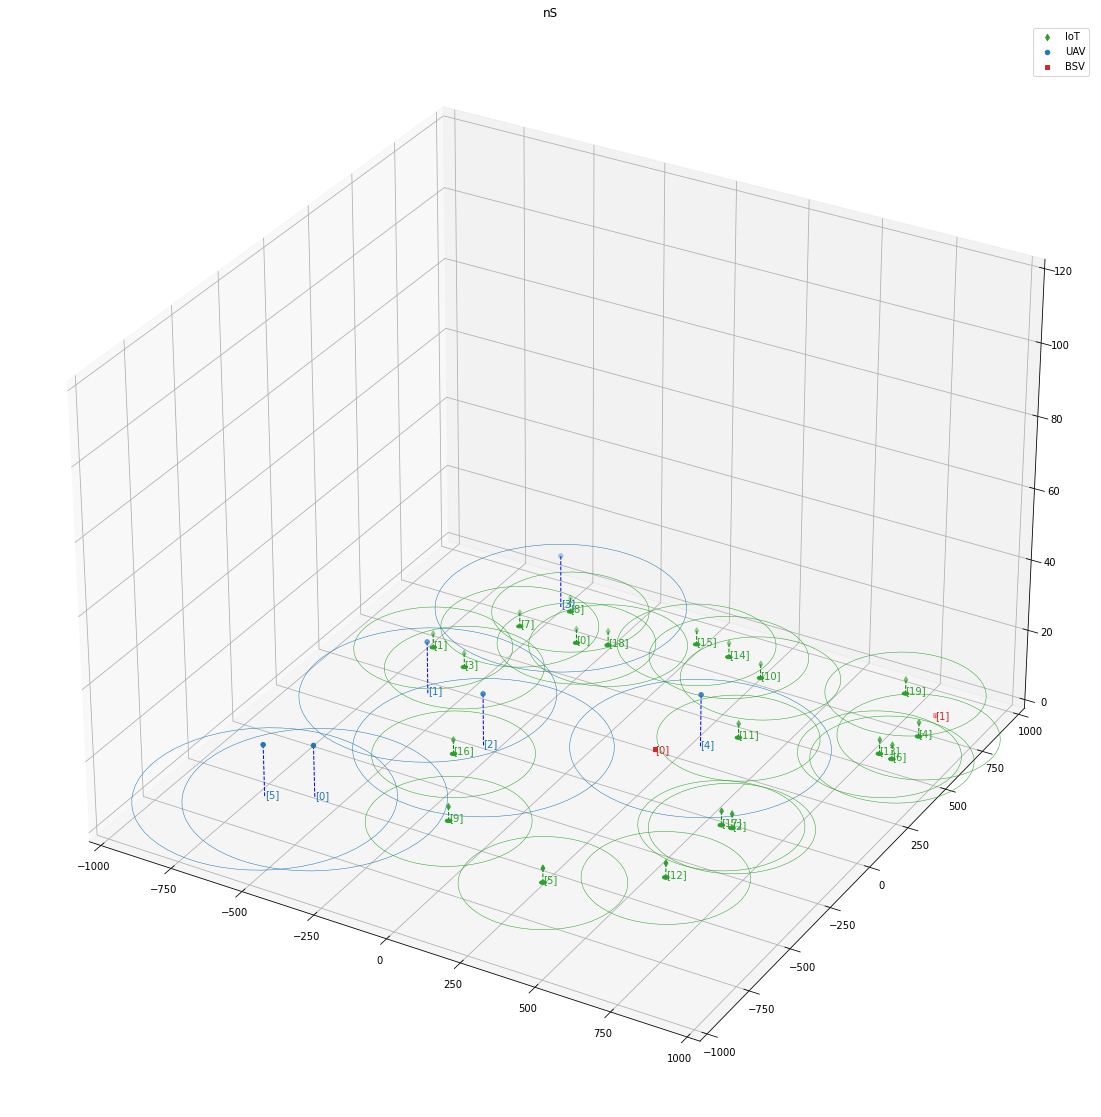

In [10]:
ns, r, a, _ = umec.step( (AD['move_BSV'], 0,200,200) )
_=umec.render(caption="nS", ant=True, cover=True, offloading=True)
umec.snap(True)

In [11]:
for i,iot in enumerate(umec.iot):
    print(i, iot, '\n')

0 [IOT]:: LOC:[tensor([-332.,  644.,    4.])], TX:[tensor([1.])/tensor([250.])], PARENT:[tensor([-1.])/tensor([0.])], TASK:[tensor([4.1450e+03, 1.0000e+01, 2.0000e+00, 3.1650e+03, 0.0000e+00])], OFF[tensor([-1.])/tensor([0.])] 

1 [IOT]:: LOC:[tensor([-708.,  395.,    4.])], TX:[tensor([1.])/tensor([250.])], PARENT:[tensor([-1.])/tensor([0.])], TASK:[tensor([2.0310e+03, 1.3000e+01, 2.0000e+00, 2.1920e+03, 0.0000e+00])], OFF[tensor([-1.])/tensor([0.])] 

2 [IOT]:: LOC:[tensor([608., -58.,   4.])], TX:[tensor([1.])/tensor([250.])], PARENT:[tensor([-1.])/tensor([0.])], TASK:[tensor([3.9610e+03, 1.9000e+01, 1.0000e+00, 2.0350e+03, 1.0000e+00])], OFF[tensor([-1.])/tensor([0.])] 

3 [IOT]:: LOC:[tensor([-562.,  341.,    4.])], TX:[tensor([1.])/tensor([250.])], PARENT:[tensor([-1.])/tensor([0.])], TASK:[tensor([3.6820e+03, 1.6000e+01, 4.0000e+00, 2.6960e+03, 1.0000e+00])], OFF[tensor([-1.])/tensor([0.])] 

4 [IOT]:: LOC:[tensor([855., 684.,   4.])], TX:[tensor([1.])/tensor([250.])], PARENT:[t

In [12]:
umec.memory.render_all()

=-=-=-=-==-=-=-=-=@[MEMORY]=-=-=-=-==-=-=-=-=
Device [cpu]	Count [8]
Capacity[10]	Pointer [8]
____________________________________
SLOT: [0]	.False.
	BSV: [tensor([[ 2.0200e+02, -4.4900e+02,  1.0000e+00,  5.0000e+04,  5.0000e+04,
          3.0000e+00],
        [ 8.5100e+02,  8.0400e+02,  1.0000e+00,  5.0000e+04,  5.0000e+04,
          3.0000e+00]])]
	UAV: [tensor([[-5.6000e+02, -5.4100e+02,  1.5000e+01, -1.0000e+00,  0.0000e+00,
          2.0000e+00,  4.0000e+02,  1.0000e+04,  1.0000e+04,  2.0000e+00],
        [-5.7800e+02,  1.4700e+02,  1.5000e+01, -1.0000e+00,  0.0000e+00,
          2.0000e+00,  4.0000e+02,  1.0000e+04,  1.0000e+04,  2.0000e+00],
        [-2.7100e+02, -3.2000e+01,  1.5000e+01, -1.0000e+00,  0.0000e+00,
          2.0000e+00,  4.0000e+02,  1.0000e+04,  1.0000e+04,  2.0000e+00],
        [-4.8600e+02,  8.1200e+02,  1.5000e+01, -1.0000e+00,  0.0000e+00,
          2.0000e+00,  4.0000e+02,  1.0000e+04,  1.0000e+04,  2.0000e+00],
        [ 3.0600e+02,  2.9500e+02,  1.5000e+0

In [13]:
umec.memory.seed(2032)

In [14]:
kp.show(umec)

=-=-=-=-==-=-=-=-=
DICT: <class 'UEMEC.core.UeMEC'>
=-=-=-=-==-=-=-=-=
rng	:	Generator(PCG64)
max_episode_steps	:	1000
params	:	<UEMEC.core.PARAMS object at 0x000002239B2CB520>
device	:	cpu
spaces	:	{'BSV': [SPACE] : shape:[(2, 6)], dtype:[torch.float32], discrete[False], ndim:[2], nflat:[12], 'UAV': [SPACE] : shape:[(6, 10)], dtype:[torch.float32], discrete[False], ndim:[2], nflat:[60], 'IOT': [SPACE] : shape:[(20, 14)], dtype:[torch.float32], discrete[False], ndim:[2], nflat:[280], 'DIU': [SPACE] : shape:[(20, 6)], dtype:[torch.float32], discrete[False], ndim:[2], nflat:[120], 'DUB': [SPACE] : shape:[(6, 2)], dtype:[torch.float32], discrete[False], ndim:[2], nflat:[12], 'REW': [SPACE] : shape:[()], dtype:[torch.float32], discrete[False], ndim:[0], nflat:[1.0], 'TERM': [SPACE] : shape:[()], dtype:[torch.bool], discrete[False], ndim:[0], nflat:[1.0], 'TS': [SPACE] : shape:[()], dtype:[torch.int32], discrete[False], ndim:[0], nflat:[1.0]}
buffers	:	{'BSV': tensor([[2.0000e+02, 2.0000e+0